In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
import pathlib
dir = r'C:\Users\Afonso\anaconda3\envs\hello-tf\Img'
data_dir = tf.keras.utils.get_file('Chars', origin=dir, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir = dir
print(data_dir)

C:\Users\Afonso\anaconda3\envs\hello-tf\Img


In [3]:
img_height,img_width=180,180
batch_size=32

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode = 'categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3410 files belonging to 62 classes.
Using 2728 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode = 'categorical',  
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3410 files belonging to 62 classes.
Using 682 files for validation.


In [6]:
dir = r'C:\Users\Afonso\anaconda3\envs\hello-tf\ResNet50'
test_dir = os.path.join(dir,'test')

In [7]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(img_height, img_width),
  label_mode = 'categorical',
  batch_size=batch_size)

Found 3410 files belonging to 62 classes.


In [8]:
## Autotune 
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
valid_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [31]:
mobilenetv2_model = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=62,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

mobilenetv2_model.add(pretrained_model)

mobilenetv2_model.add(Flatten())
mobilenetv2_model.add(Dense(512, activation='relu'))
mobilenetv2_model.add(Dense(62, activation='softmax'))
mobilenetv2_model.add(Dropout(0.2))

In [32]:
mobilenetv2_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               655872    
                                                                 
 dense_7 (Dense)             (None, 62)                31806     
                                                                 
 dropout (Dropout)           (None, 62)                0         
                                                                 
Total params: 2,945,662
Trainable params: 687,678
Non-trainable params: 2,257,984
______________________________________

In [33]:
mobilenetv2_model.compile(optimizer=Adam(learning_rate=0.0001),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [34]:
loss0, accuracy0 = mobilenetv2_model.evaluate(test_ds)

107/107 [==============================] - 115s 823ms/step - loss: 4.1272 - accuracy: 0.0152


In [14]:
history = mobilenetv2_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
86/86 [==============================] - 78s 851ms/step - loss: 3.5623 - accuracy: 0.1811 - val_loss: 2.8133 - val_accuracy: 0.3504
Epoch 2/10
86/86 [==============================] - 75s 858ms/step - loss: 2.2460 - accuracy: 0.5007 - val_loss: 1.9250 - val_accuracy: 0.5733
Epoch 3/10
86/86 [==============================] - 76s 868ms/step - loss: 1.5779 - accuracy: 0.6492 - val_loss: 1.5132 - val_accuracy: 0.6422
Epoch 4/10
86/86 [==============================] - 76s 868ms/step - loss: 1.2275 - accuracy: 0.7232 - val_loss: 1.2802 - val_accuracy: 0.6833
Epoch 5/10
86/86 [==============================] - 76s 876ms/step - loss: 1.0211 - accuracy: 0.7636 - val_loss: 1.1377 - val_accuracy: 0.7170
Epoch 6/10
86/86 [==============================] - 76s 873ms/step - loss: 0.8694 - accuracy: 0.7984 - val_loss: 1.0417 - val_accuracy: 0.7243
Epoch 7/10
86/86 [==============================] - 81s 935ms/step - loss: 0.7672 - accuracy: 0.8200 - val_loss: 0.9826 - val_accuracy: 0.7405

Mean Validation Accuracy: 0.6699413448572159
Mean Training Accuracy:0.7003299117088317
Mean Validation Loss: 1.3359593510627747
Mean Training Loss:1.3125063538551331


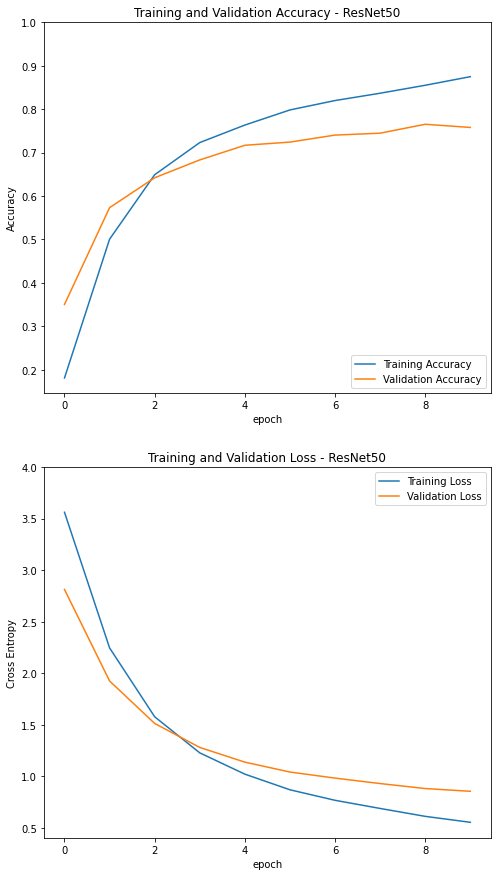

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#Means of accuracy
sum_acc = 0
for i in range(len(acc)):
    sum_acc = sum_acc + acc[i]
    acc_mean = sum_acc / len(acc)

sum_val_acc = 0
for i in range(len(val_acc)):
    sum_val_acc = sum_val_acc + val_acc[i]
    val_acc_mean = sum_val_acc / len(val_acc)

print('Mean Validation Accuracy: ' + str(val_acc_mean))
print('Mean Training Accuracy:' + str(acc_mean))

#Means of Loss
sum_loss = 0
for i in range(len(loss)):
    sum_loss = sum_loss + loss[i]
    loss_mean = sum_loss / len(loss)

sum_val_loss = 0
for i in range(len(val_loss)):
    sum_val_loss = sum_val_loss + val_loss[i]
    val_loss_mean = sum_val_loss / len(val_loss)

print('Mean Validation Loss: ' + str(val_loss_mean))
print('Mean Training Loss:' + str(loss_mean))


plt.figure(figsize=(8, 15))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy - ResNet50')
plt.xlabel('epoch')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.ylim([min(plt.ylim()),4])
plt.title('Training and Validation Loss - ResNet50')
plt.xlabel('epoch')
plt.show()

In [16]:
## Fine Tunning 
mobilenetv2_model.trainable = True ##unfreeze top layers 

In [18]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(mobilenetv2_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 1

# Freeze all the layers before the `fine_tune_at` layer
for layer in mobilenetv2_model.layers[:fine_tune_at]:
        layer.trainable =  False

Number of layers in the base model:  4


In [19]:
mobilenetv2_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

In [20]:
mobilenetv2_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 62)                31806     
                                                                 
Total params: 2,945,662
Trainable params: 687,678
Non-trainable params: 2,257,984
_________________________________________________________________


In [21]:
history_fine = mobilenetv2_model.fit(train_ds,
                         epochs=20,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)

Epoch 10/20
86/86 [==============================] - 80s 874ms/step - loss: 0.5228 - accuracy: 0.8765 - val_loss: 0.8269 - val_accuracy: 0.7551
Epoch 11/20
86/86 [==============================] - 76s 872ms/step - loss: 0.4619 - accuracy: 0.8941 - val_loss: 0.8063 - val_accuracy: 0.7522
Epoch 12/20
86/86 [==============================] - 83s 956ms/step - loss: 0.4205 - accuracy: 0.9069 - val_loss: 0.7748 - val_accuracy: 0.7727
Epoch 13/20
86/86 [==============================] - 79s 903ms/step - loss: 0.3825 - accuracy: 0.9168 - val_loss: 0.7513 - val_accuracy: 0.7845
Epoch 14/20
86/86 [==============================] - 77s 889ms/step - loss: 0.3485 - accuracy: 0.9256 - val_loss: 0.7607 - val_accuracy: 0.7727
Epoch 15/20
86/86 [==============================] - 79s 907ms/step - loss: 0.3214 - accuracy: 0.9377 - val_loss: 0.7353 - val_accuracy: 0.7845
Epoch 16/20
86/86 [==============================] - 76s 878ms/step - loss: 0.2913 - accuracy: 0.9417 - val_loss: 0.7185 - val_accuracy:

In [22]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

Mean Validation Accuracy: 0.7791255766695196
Mean Training Accuracy:0.9293854941021312
Mean Validation Loss: 0.7429543029178273
Mean Training Loss:0.3364745622331446


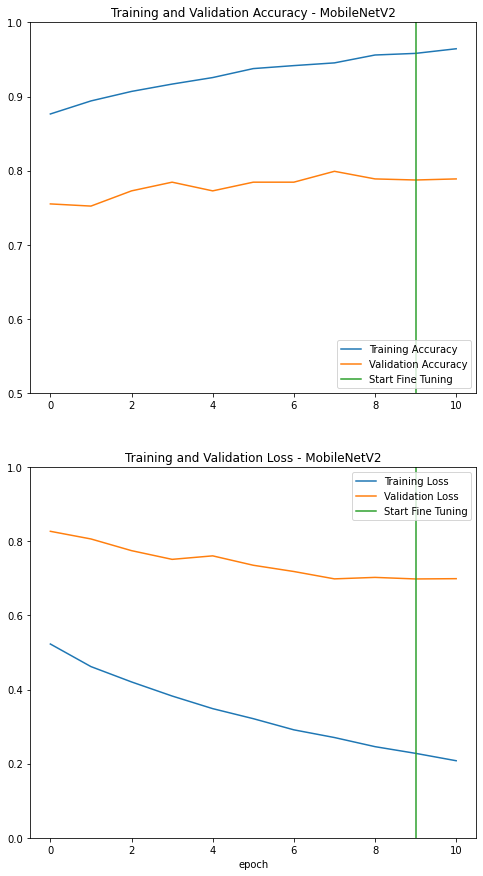

In [27]:
#Means of accuracy
sum_acc = 0
for i in range(len(acc)):
    sum_acc = sum_acc + acc[i]
    acc_mean = sum_acc / len(acc)

sum_val_acc = 0
for i in range(len(val_acc)):
    sum_val_acc = sum_val_acc + val_acc[i]
    val_acc_mean = sum_val_acc / len(val_acc)

print('Mean Validation Accuracy: ' + str(val_acc_mean))
print('Mean Training Accuracy:' + str(acc_mean))

#Means of Loss
sum_loss = 0
for i in range(len(loss)):
    sum_loss = sum_loss + loss[i]
    loss_mean = sum_loss / len(loss)

sum_val_loss = 0
for i in range(len(val_loss)):
    sum_val_loss = sum_val_loss + val_loss[i]
    val_loss_mean = sum_val_loss / len(val_loss)

print('Mean Validation Loss: ' + str(val_loss_mean))
print('Mean Training Loss:' + str(loss_mean))



plt.figure(figsize=(8, 15))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.5, 1])
plt.plot([10-1,10-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy - MobileNetV2')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([10-1,10-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss - MobileNetV2')
plt.xlabel('epoch')
plt.show()

In [24]:
score = mobilenetv2_model.evaluate(test_ds)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

107/107 [==============================] - 79s 723ms/step - loss: 0.2941 - accuracy: 0.9323
Test loss: 0.29406896233558655
Test accuracy: 0.9322580695152283


In [26]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = mobilenetv2_model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)


Predictions:
 [1 1 1 ... 1 1 1]
Labels:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
